<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Customer-Purchase-Prediction" data-toc-modified-id="Customer-Purchase-Prediction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Customer Purchase Prediction</a></span><ul class="toc-item"><li><span><a href="#Import-libraries-and-load-data" data-toc-modified-id="Import-libraries-and-load-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import libraries and load data</a></span><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Load Data</a></span></li></ul></li><li><span><a href="#Review-Data" data-toc-modified-id="Review-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Review Data</a></span></li><li><span><a href="#Select-features-based-on-Correlation" data-toc-modified-id="Select-features-based-on-Correlation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Select features based on Correlation</a></span></li><li><span><a href="#Create-Model-for-Predicting-Buy" data-toc-modified-id="Create-Model-for-Predicting-Buy-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Create Model for Predicting Buy</a></span><ul class="toc-item"><li><span><a href="#Test-Train-splitting" data-toc-modified-id="Test-Train-splitting-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Test Train splitting</a></span></li><li><span><a href="#Build-Model-and-Check-Metrics" data-toc-modified-id="Build-Model-and-Check-Metrics-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Build Model and Check Metrics</a></span></li></ul></li><li><span><a href="#Plot-and-visualise-Decision-Tree-Path" data-toc-modified-id="Plot-and-visualise-Decision-Tree-Path-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Plot and visualise Decision Tree Path</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Check-the-probability-of-buy" data-toc-modified-id="Check-the-probability-of-buy-1.5.0.1"><span class="toc-item-num">1.5.0.1&nbsp;&nbsp;</span>Check the probability of buy</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#New-Customer-Modeling" data-toc-modified-id="New-Customer-Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>New Customer Modeling</a></span></li></ul></div>

# Customer Purchase Prediction

Using past purchase history of a website and whether the customer buys a product, to build a model to predict if a new customer will purchae a product. 

## Import libraries and load data

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report as report
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import accuracy_score as acc_score

### Load Data

In [2]:
prospect_df = pd.read_csv('browsing.csv')
print('Review data')
prospect_df.head()

Review data


,SESSION_ID,IMAGES,REVIEWS,FAQ,SPECS,SHIPPING,BOUGHT_TOGETHER,COMPARE_SIMILAR,VIEW_SIMILAR,WARRANTY,SPONSORED_LINKS,BUY
0,1001,0,0,1,0,1,0,0,0,1,0,0
1,1002,0,1,1,0,0,0,0,0,0,1,0
2,1003,1,0,1,1,1,0,0,0,1,0,0
3,1004,1,0,0,0,1,1,1,0,0,0,0
4,1005,1,1,1,0,1,0,1,0,0,0,0


In [3]:
prospect_df.dtypes

SESSION_ID         int64
IMAGES             int64
REVIEWS            int64
FAQ                int64
SPECS              int64
SHIPPING           int64
BOUGHT_TOGETHER    int64
COMPARE_SIMILAR    int64
VIEW_SIMILAR       int64
WARRANTY           int64
SPONSORED_LINKS    int64
BUY                int64
dtype: object

## Review Data

In [4]:
display(prospect_df.describe())
corr = prospect_df.corr().iloc[:,-1]
high_corr = np.where(( np.logical_or(corr>0.1,corr<-0.1) ))
print(high_corr)

,SESSION_ID,IMAGES,REVIEWS,FAQ,SPECS,SHIPPING,BOUGHT_TOGETHER,COMPARE_SIMILAR,VIEW_SIMILAR,WARRANTY,SPONSORED_LINKS,BUY
count,500.000000,500.000000,500.0000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1250.500000,0.510000,0.5200,0.440000,0.4800,0.528000,0.500000,0.580000,0.468000,0.532000,0.550000,0.370000
std,144.481833,0.500401,0.5001,0.496884,0.5001,0.499715,0.500501,0.494053,0.499475,0.499475,0.497992,0.483288
min,1001.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1125.750000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1250.500000,1.000000,1.0000,0.000000,0.0000,1.000000,0.500000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,1375.250000,1.000000,1.0000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1500.000000,1.000000,1.0000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([ 2,  6,  7,  9, 10, 11], dtype=int64),)


## Select features based on Correlation

In [5]:
predictors = prospect_df[prospect_df.columns[high_corr]]
labels = predictors.iloc[:,-1]
predictors=predictors.drop(['BUY'], axis=1)
predictors.head(1)


,REVIEWS,BOUGHT_TOGETHER,COMPARE_SIMILAR,WARRANTY,SPONSORED_LINKS
0,0,0,0,1,0


The data type is kept in the integer format, although the data is categorical in nature. This is because of the models that is used requires them in the integer format. In Data Mining projects that utilises the framework CRISP-DM, the pre-processing and modeling can go back and forth to update data formats for model consumptions.

## Create Model for Predicting Buy

### Test Train splitting

In [6]:
x_train, x_test, y_train, y_test = tts(predictors, labels, test_size=0.3, shuffle=True, random_state=6)

### Build Model and Check Metrics

Check the documentation for Gaussian Naive Bayes classifier here
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [32]:
gnb_classifier = GNB()
model_gnb = gnb_classifier.fit(x_train, y_train)
pred = model_gnb.predict(x_test)
acc=acc_score(y_test, pred)
print('Confusion Matrix \n',CM(y_test, pred))
print('Accuracy of model= {:.1f}%.'.format(acc *100))

Confusion Matrix 
 [[81 12]
 [29 28]]
Accuracy of model= 72.7%.


The use of Cross Valiation support model and decision tree classifier. The Cross validation helps with understanding the robustness of the model as it trains the model on diffent selections of the training data. More about decision Tree classifier here https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier

In [36]:
from sklearn.model_selection import cross_validate
cv = StratifiedKFold(shuffle=True)
classifer_dtc = DTC(random_state=6)
cvs = cross_val_score(classifer_dtc, x_train, y_train, cv=cv)
cvt = cross_validate(classifer_dtc, x_train, y_train, cv=cv)
print('With use of Cross validation the mean model average = {:.1f}%, the maximum score was {:.1f}% and the minimum score was {:.1f}%'.format(cvs.mean()*100, cvs.max()*100, cvs.min()*100))
model_dif = cvs.mean()*100 -(acc *100)
print('THe difference between the DTC and GNB is {:.1f}%'.format(model_dif))

With use of Cross validation the mean model average = 73.7%, the maximum score was 78.6% and the minimum score was 62.9%
THe difference between the DTC and GNB is 1.0%


## Plot and visualise Decision Tree Path

One thing about the decision tree classifier it allows you to export the tree path as an image.

In [9]:
import graphviz
from sklearn import tree
import io
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg
import io
#convert datafames to lists.
target = list(str(labels.unique()))
feature_names = list(predictors.columns)

In [20]:
#export the decision tree classifier path as StringIO
model_dtc = classifer_dtc.fit(x_train, y_train, check_input=True)
dot_data = io.StringIO()

tree.export_graphviz(model_dtc,
                        out_file=dot_data, 
                        feature_names=feature_names,  
                        class_names=target,  
                        filled=True, rounded=True,  
                        special_characters=True,
                         ) 


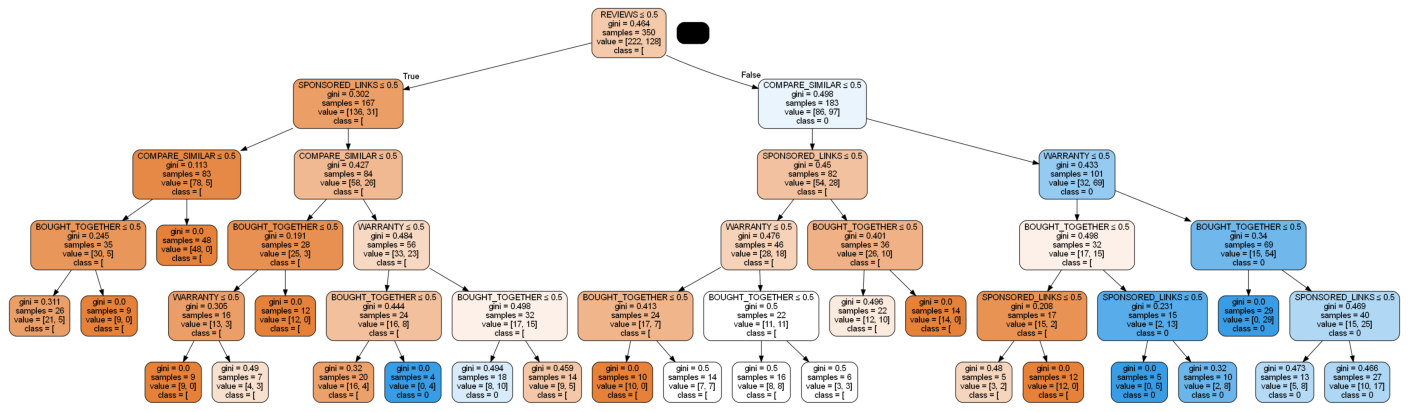

In [21]:
#save the data as png and read the image with plt.
filename = "tree.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)
plt.figure(figsize=(25,25)) # set image size
img = mpimg.imread(filename)
plt.imshow(img)
plt.axis('off')
plt.show()

#### Check the probability of buy

In [37]:
prediction_probability = model_gnb.predict_proba(x_test)
print('Probability of Buy is {:.1f}%.'.format(prediction_probability[0,1]*100))

Probability of Buy is 75.1%.


# New Customer Modeling

In [29]:
new_customer = np.zeros(5).reshape(1,-1)
columns = (predictors.columns)
new_customer_df = pd.DataFrame(new_customer, columns=columns.T)
new_customer_df.head()

,REVIEWS,BOUGHT_TOGETHER,COMPARE_SIMILAR,WARRANTY,SPONSORED_LINKS
0,0.0,0.0,0.0,0.0,0.0


The new customer now looks at reviews and the table updates to reflex.

In [30]:
new_customer_df['REVIEWS'][0] = 1
new_customer_df.head()

,REVIEWS,BOUGHT_TOGETHER,COMPARE_SIMILAR,WARRANTY,SPONSORED_LINKS
0,1.0,0.0,0.0,0.0,0.0


After the new customer looks at the reviews the probability of the customer purchasing a item is now calculated and shown below.

In [31]:
prob_update = model_gnb.predict_proba(new_customer_df)[0,1]
print('Probability of Buy after Review is {:.1f}%.'.format(prob_update*100))

Probability of Buy after Review is 23.8%.


now the customer checks similar products.

In [16]:
new_customer_df['COMPARE_SIMILAR'][0] = 1
new_customer_df.head()

,REVIEWS,BOUGHT_TOGETHER,COMPARE_SIMILAR,WARRANTY,SPONSORED_LINKS
0,1.0,0.0,1.0,0.0,0.0


In [17]:
prob_update = model_gnb.predict_proba(new_customer_df)[0,1]
print('Probability of Buy after checking similar products is {:.1f}%.'.format(prob_update*100))

Probability of Buy after checking similar products is 47.1%.


Now the customer checks a products Warranty

In [18]:
new_customer_df['WARRANTY'][0] = 1 
new_customer_df.head()

,REVIEWS,BOUGHT_TOGETHER,COMPARE_SIMILAR,WARRANTY,SPONSORED_LINKS
0,1.0,0.0,1.0,1.0,0.0


In [19]:
prob_update = model_gnb.predict_proba(new_customer_df)[0,1]
print('Probability of Buy after checking a products warranty is {:.1f}%.'.format(prob_update*100))

Probability of Buy after checking a products warranty is 70.7%.


When the probability is above a good level then we can streamline the purchase goal even more or put in support like a chat to assistant window for customer.